In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [4]:
(train_data,train_labels) ,(test_data, test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [7]:
train_data.shape

(25000,)

In [ ]:
train_data[0]

In [14]:
train_labels[0]

1

In [9]:
len(train_data[0])

218

In [11]:
train_labels[20000]

0

In [17]:
len(train_labels)

25000

In [12]:
tokenizer=Tokenizer(num_words=10000)
X_train=tokenizer.sequences_to_matrix(train_data , mode='binary')
X_test=tokenizer.sequences_to_matrix(test_data , mode='binary')

In [13]:
X_train.shape

(25000, 10000)

In [15]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

ここでは、X(data)は文字列、yはラベルである

In [27]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [31]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [39]:
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics='accuracy')

In [ ]:
history=model.fit(x=X_train,
          y=y_train,
          epochs=20,
          batch_size=512,
          verbose=1,
          validation_data=(X_val, y_val))

In [48]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

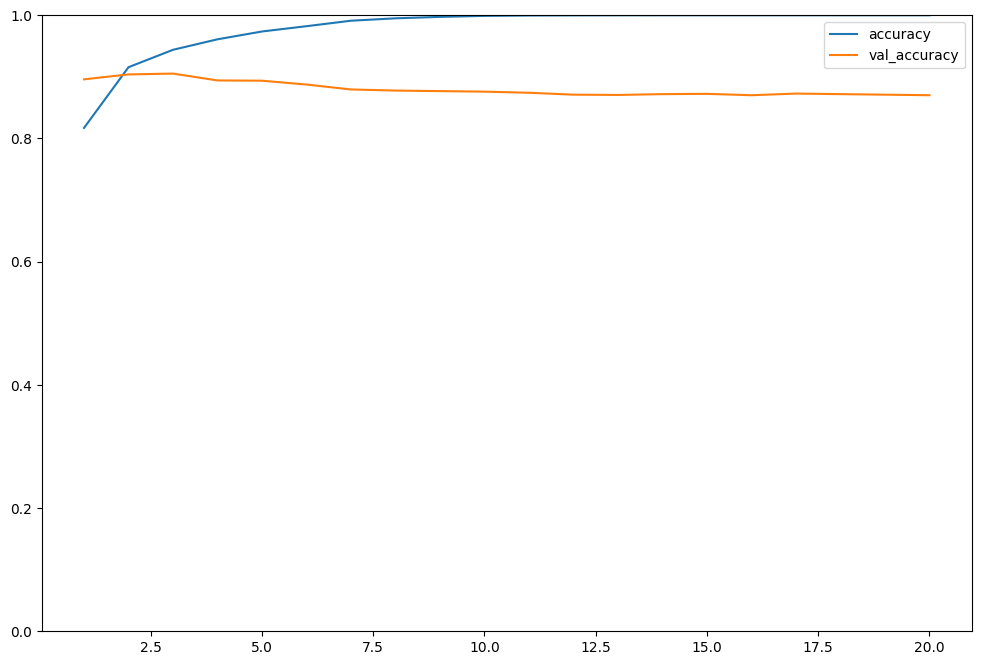

In [52]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)


plt.figure(figsize=(12, 8))
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.show()


In [53]:
score=model.evaluate(X_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.8296 - accuracy: 0.8555
